In [46]:
# Load excel files from results/a_{a}/ROI_v2/{dataset}/{dataset}_merged_v2.xlsx
# There are multiple sheets, all need to be loaded
# sheets corresponds to models

vals_a = [0.5, 1, 2, 5, 10]
datasets = ["MSC", "TC"]

In [47]:
import pandas as pd
import numpy as np

def load_excel(a, dataset):
    df = pd.read_excel(f"results/a_{a}/ROI_v2/{dataset}/{dataset}_merged_v2.xlsx", sheet_name=None)
    return df

In [48]:
df = {}
for a in vals_a:
    df[a] = {}
    for dataset in datasets:
        df[a][dataset] = load_excel(a, dataset)
        # Drop BLEU, METEOR, ROUGE-L
        c = ["BLEU", "Bert-f1", "rougeL"]
        c = [[f"ZS.{x}", f"FS.{x}"] for x in c]
        c = [item for sublist in c for item in sublist]
        df[a][dataset] = {k: v.drop(columns=c) for k, v in df[a][dataset].items()}

In [49]:
df[1]["MSC"]["T0"].sample(5)

,History Signal,Persona,Prompt,ZS.BLEURT,ZS.DEB,ZS.METEOR,FS.BLEURT,FS.DEB,FS.METEOR
6,Recent-10,None,normal,9.6288,26.0726,4.3057,4.6110,12.8767,2.1977
28,Semantic-10,None,ppl,9.7584,24.7405,3.8175,4.1724,11.0250,2.0297
19,None_1,None,ppl,41.2393,85.3753,14.1639,16.4870,41.7226,7.7063
24,Recent-2,None,ppl,20.4918,51.0849,8.4496,8.0076,20.5361,3.7961
7,Recent-2,None,normal,18.1921,48.2356,8.1273,8.3377,22.8009,3.9559


## Overall Mean UID

In [50]:
# new dataframe for mean performances for each model, dataset and a
df_mean_MSC = {}
df_mean_TC = {}

for a in vals_a:
    df_mean_MSC[a] = pd.DataFrame()
    df_mean_TC[a] = pd.DataFrame()
    for model in df[a]["MSC"].keys():
        df_mean_MSC[a][model] = df[a]["MSC"][model].mean()
        df_mean_TC[a][model] = df[a]["TC"][model].mean()

<ipython-input-50-70114918a62b>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean_MSC[a][model] = df[a]["MSC"][model].mean()
<ipython-input-50-70114918a62b>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean_TC[a][model] = df[a]["TC"][model].mean()


In [51]:
# function to take mean of pair of rows with index ZS.{x} and FS.{x}
def mean_ZS_FS(df):
    df_mean = pd.DataFrame(columns=df.columns)
    for i, row in df.iterrows():
        if i.startswith("ZS"):
            df_mean.loc[i.replace("ZS.", "")] = (df.loc[i] + df.loc[i.replace("ZS", "FS")])/2

    return df_mean

In [52]:
for a in vals_a:
    df_mean_MSC[a] = mean_ZS_FS(df_mean_MSC[a])
    df_mean_TC[a] = mean_ZS_FS(df_mean_TC[a])

    # Transpose
    df_mean_MSC[a] = df_mean_MSC[a].T
    df_mean_TC[a] = df_mean_TC[a].T
    

In [53]:
df_mean_MSC[0.5]

,BLEURT,DEB,METEOR
flanT5-XL,1.998931,2.880106,1.234471
T0,2.012413,3.227519,1.313487
Tk-Instruct,2.065238,3.100557,1.240249
GPT-3,2.045274,3.158085,1.397500


In [54]:
df_mean_MSC[1]

,BLEURT,DEB,METEOR
flanT5-XL,12.051712,25.103638,4.596447
T0,11.952976,30.766682,5.095476
Tk-Instruct,12.392876,27.995106,4.471969
GPT-3,12.691400,30.269091,5.930076


In [55]:
df_mean_MSC[2]

,BLEURT,DEB,METEOR
flanT5-XL,438.910988,1926.821797,63.851994
T0,422.397462,2805.048503,76.976640
Tk-Instruct,447.048865,2300.560007,58.346300
GPT-3,489.172676,2786.306688,107.124638


In [56]:
np.log(df_mean_MSC[5])

,BLEURT,DEB,METEOR
flanT5-XL,16.883860,20.648267,12.066761
T0,16.753892,21.498220,12.520922
Tk-Instruct,16.873235,21.023099,11.799927
GPT-3,17.155292,21.514852,13.378101


In [57]:
np.log(df_mean_MSC[10])

,BLEURT,DEB,METEOR
flanT5-XL,34.924982,42.614405,25.307679
T0,34.641469,44.145912,26.267699
Tk-Instruct,34.867771,43.303802,24.777128
GPT-3,35.445611,44.197174,27.939046


## Average across models

In [58]:
df[1]['MSC']

{'flanT5-XL':    History Signal     Persona  Prompt  ZS.BLEURT   ZS.DEB  ZS.METEOR  \
 0            BART        None  normal    18.8919  40.9520     6.8205   
 1            Full        None  normal     6.7660  16.2571     2.4279   
 2          None_1        None  normal    42.0373  84.8947    15.0465   
 3      Pegasus-CD        None  normal    18.2432  37.9448     6.2578   
 4       PegasusFT        None  normal    18.7467  40.8501     6.8292   
 5        Recent-1        None  normal    22.6068  47.6039     8.3718   
 6       Recent-10        None  normal    10.3733  23.1944     3.8576   
 7        Recent-2        None  normal    19.8968  41.5581     7.3116   
 8        Recent-4        None  normal    15.5890  33.2533     5.7964   
 9        Recent-8        None  normal    11.5109  25.2264     4.2745   
 10     Semantic-1        None  normal    23.8335  44.7330     8.4821   
 11    Semantic-10        None  normal     9.6348  20.2045     3.6591   
 12     Semantic-2        None  normal

In [59]:
# Get average across model dataframes, but only for normal prompt
df_mean_m = {
    "MSC": {},
    "TC": {}
}

for a in vals_a:
    for dataset in datasets:
        dfs_to_mean = []
        for model in df[a][dataset].keys():
            df_src = df[a][dataset][model]
            dfs_to_mean.append(df_src.loc[df_src["Prompt"] == "normal"])
        # Take average across collected dataframes, by match ["History", "Persona", "Prompt"]
        df_mean_m[dataset][a] = pd.concat(dfs_to_mean).groupby(["History Signal", "Persona", "Prompt"]).mean().reset_index()
        

In [60]:
# Save to excel, sheets = {dataset}_{a}
with pd.ExcelWriter("results/ROI_v4.xlsx") as writer:
    for dataset in datasets:
        for a in vals_a:
            df_mean_m[dataset][a].to_excel(writer, sheet_name=f"{dataset}_{a}", index=False)

### Rank Bump Chart

In [101]:
# Get Rank df of "History Signal" for each dataset, a
df_rank = {
    "MSC": {},
    "TC": {}
}

for dataset in datasets:
    for a in vals_a:
        df_rank[dataset][a] = df_mean_m[dataset][a].copy()
        # Drop following rows (History Signal=BART, Persona=Pegasus_CD) and (History Signal=None_1, persona=None)
        df_rank[dataset][a] = df_rank[dataset][a].drop(df_rank[dataset][a][(df_rank[dataset][a]["History Signal"] == "BART") & (df_rank[dataset][a]["Persona"] == "Pegasus-CD")].index)
        df_rank[dataset][a] = df_rank[dataset][a].drop(df_rank[dataset][a][(df_rank[dataset][a]["History Signal"] == "None_1") & (df_rank[dataset][a]["Persona"] == "None")].index)

        # Rename PegasusFT + Pegasus-CD to PegasusDS + BI
        j = ((df_rank[dataset][a]["History Signal"] == "PegasusFT") & (df_rank[dataset][a]["Persona"] == "Pegasus-CD"))
        df_rank[dataset][a].loc[j, "History Signal"] = "PegasusDS + BI"

        j = (df_rank[dataset][a]["History Signal"] == "PegasusFT")
        df_rank[dataset][a].loc[j, "History Signal"] = "PegasusDS"

        j = (df_rank[dataset][a]["History Signal"] == "BART")
        df_rank[dataset][a].loc[j, "History Signal"] = "BART-D"
        
        for col in ["ZS.BLEURT", "ZS.DEB", "ZS.METEOR"]: # df_rank[dataset][a].columns:
            df_rank[dataset][a][col] = df_rank[dataset][a][col].rank(ascending=False)
        # df_rank[dataset][a].columns = ["History Signal", "Rank"]

In [102]:
df_mean_m["MSC"][10]

,History Signal,Persona,Prompt,ZS.BLEURT,ZS.DEB,ZS.METEOR,FS.BLEURT,FS.DEB,FS.METEOR
0,BART,None,normal,3.376844e+15,2.226752e+19,7.587911e+11,1.046955e+15,1.142758e+19,4.379493e+11
1,BART,Pegasus-CD,normal,1.719676e+15,1.331358e+19,6.604288e+11,6.219106e+14,8.118806e+18,2.726311e+11
2,Full,None,normal,7.273078e+14,8.737253e+18,3.508983e+11,3.564888e+14,4.288025e+18,1.675998e+11
3,None_1,None,normal,8.305859e+15,2.071262e+19,1.372693e+12,2.258441e+15,2.451649e+19,1.294865e+12
4,Pegasus-CD,None,normal,2.259750e+15,2.489723e+19,5.572965e+11,8.113443e+14,1.162830e+19,3.687659e+11
5,PegasusFT,None,normal,3.361030e+15,2.275340e+19,8.573968e+11,1.373639e+15,5.760731e+18,3.804706e+11
6,PegasusFT,Pegasus-CD,normal,1.716438e+15,1.329169e+19,6.830281e+11,6.206700e+14,8.165599e+18,2.856973e+11
7,Recent-1,None,normal,1.346752e+15,9.440416e+18,1.913269e+11,4.819379e+14,4.522688e+18,1.449901e+11
8,Recent-10,None,normal,9.816997e+14,1.103619e+19,1.438926e+11,5.573655e+14,5.500676e+18,2.119795e+11
9,Recent-2,None,normal,2.973747e+15,2.066753e+19,5.566685e+11,1.035705e+15,9.567388e+18,3.147149e+11


In [103]:
df_rank["MSC"][0.5]

,History Signal,Persona,Prompt,ZS.BLEURT,ZS.DEB,ZS.METEOR,FS.BLEURT,FS.DEB,FS.METEOR
0,BART-D,None,normal,4.0,3.0,6.0,1.501875,2.372525,0.986350
2,Full,None,normal,15.0,15.0,15.0,0.579725,0.929125,0.390750
4,Pegasus-CD,None,normal,7.0,7.0,7.0,1.381500,2.210875,0.912650
5,PegasusDS,None,normal,5.0,4.0,5.0,1.529450,2.267950,0.964025
6,PegasusDS + BI,Pegasus-CD,normal,10.0,10.0,10.0,0.980575,1.577650,0.650250
7,Recent-1,None,normal,2.0,1.0,1.0,1.713725,2.666125,1.114750
8,Recent-10,None,normal,13.0,13.0,13.0,0.809650,1.268675,0.529775
9,Recent-2,None,normal,6.0,5.0,4.0,1.449825,2.238200,0.939825
10,Recent-4,None,normal,9.0,9.0,9.0,1.159525,1.796750,0.753025
11,Recent-8,None,normal,11.0,11.0,11.0,0.884925,1.379950,0.576875


In [104]:
from bumpplot import bumpchart
import matplotlib.pyplot as plt

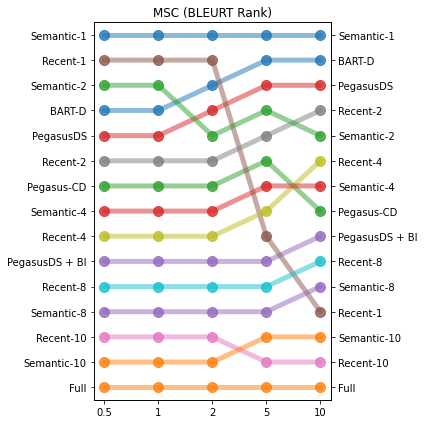

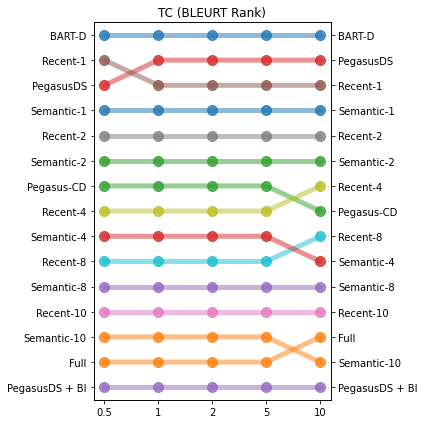

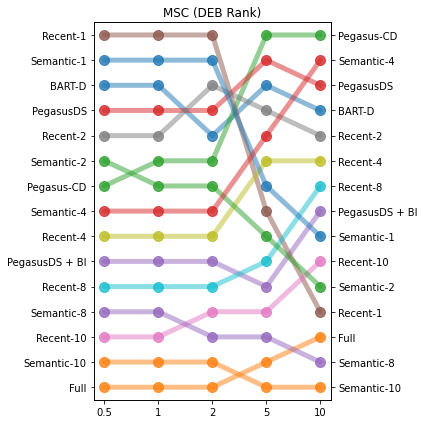

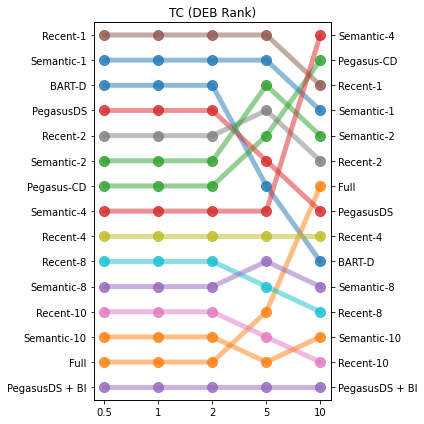

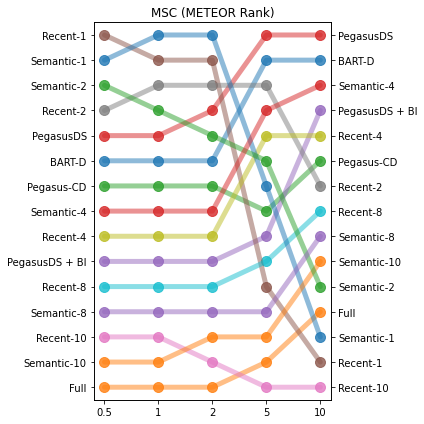

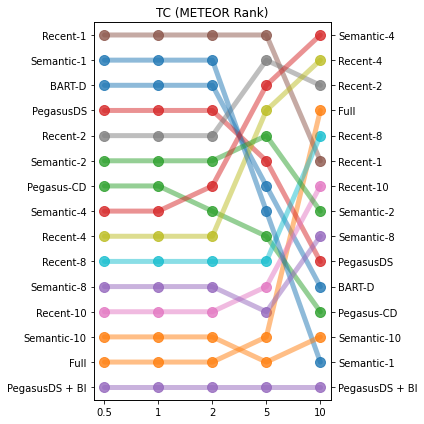

In [108]:
for metric in ["BLEURT", "DEB", "METEOR"]:
    for dataset in datasets:
        df_select_merge = None 
        for a in vals_a:
            df_select = df_rank[dataset][a][["History Signal", f"ZS.{metric}"]]
            df_select.set_index("History Signal", inplace=True)
            df_select.columns = [str(a)]
            df_select = df_select.T
            if df_select_merge is None:
                df_select_merge = df_select
            else:
                df_select_merge = df_select_merge.append(df_select)

        plt.figure(figsize=(6, 6))
        
        bumpchart(df_select_merge, show_rank_axis=False, scatter=True, holes= False,
                line_args= {"linewidth": 5, "alpha": 0.5}, scatter_args= {"s": 100, "alpha": 0.8})
        plt.title(f"{dataset} ({metric} Rank)")
        plt.tight_layout()
        plt.savefig(f"results/rebuttal_plots/bumpplot_{dataset}_{metric}.pdf", dpi=300)
        plt.savefig(f"results/rebuttal_plots/bumpplot_{dataset}_{metric}.png", dpi=300)
        plt.show()

In [82]:
df_select_merge

History Signal,BART,Full,Pegasus-CD,PegasusFT,PegasusFT,Recent-1,Recent-10,Recent-2,Recent-4,Recent-8,Semantic-1,Semantic-10,Semantic-2,Semantic-4,Semantic-8
0.5,3.0,15.0,7.0,4.0,10.0,1.0,13.0,5.0,9.0,11.0,2.0,14.0,6.0,8.0,12.0
1,3.0,15.0,6.0,4.0,10.0,1.0,13.0,5.0,9.0,11.0,2.0,14.0,7.0,8.0,12.0
2,5.0,15.0,6.0,4.0,10.0,1.0,12.0,3.0,9.0,11.0,2.0,14.0,7.0,8.0,13.0
5,3.0,14.0,1.0,2.0,11.0,8.0,12.0,4.0,6.0,10.0,7.0,15.0,9.0,5.0,13.0
10,4.0,13.0,1.0,3.0,8.0,12.0,10.0,5.0,6.0,7.0,9.0,15.0,11.0,2.0,14.0


## Merge into single excel file

In [61]:
# In each dataframe df[{a}][{dataset}][{model}]
# reorganize columns ZS.BLEURT, FS.BLEURT, ZS.DEB, FS.DEB, ZS.METEOR, FS.METEOR.

cols = df[1]["MSC"]["T0"].columns
cols = [[x, x.replace("ZS", "FS")] for x in cols if x.startswith("ZS")]
cols = [item for sublist in cols for item in sublist]
print(cols)
id_cols = [x for x in df[1]["MSC"]["T0"].columns if x not in cols]
print(id_cols)

for a in vals_a:
    for dataset in datasets:
        for model in df[a][dataset].keys():
            df[a][dataset][model] = df[a][dataset][model][cols + id_cols]

# # merge the cols values from rows with Prompt = "manual" and "ppl" and drop the later
id_cols.remove("Prompt")
for a in vals_a:
    for dataset in datasets:
        for model in df[a][dataset].keys():
            if model == "GPT-3":
                break
            print(df[a][dataset][model]["Prompt"].unique())
            df_manual = df[a][dataset][model][df[a][dataset][model]["Prompt"] == "normal"]
            df_ppl = df[a][dataset][model][df[a][dataset][model]["Prompt"] == "ppl"]
            print(f"Config: {a}, Dataset: {dataset}, Model: {model}")
            print(f"Shape of df_manual: {df_manual.shape}")
            print(f"Shape of df_ppl: {df_ppl.shape}")
            df[a][dataset][model] = df_manual.merge(df_ppl, on=id_cols, how="left", suffixes=(None, "_ppl"))

# append the dataframes for datasets
cols_ppl = [x + "_ppl" for x in cols]
new_dfs = {}
for a in vals_a:
    new_dfs[a] = {}
    for model in df[a]["MSC"].keys():
        df[a]["MSC"][model]["dataset"] = "MSC"
        df[a]["TC"][model]["dataset"] = "TC"

        H = df[a]["MSC"][model].append(df[a]["TC"][model])

        # ordering should be dataset, rest, cols
        ordering = H.columns.tolist()
        # dataset, History, Persona, Prompt, {cols}, Prompt_ppl, {cols_ppl}
        ordering = [
            "dataset",
            "History Signal",
            "Persona",
            "Prompt",            
        ] + cols
        if model != "GPT-3":
            ordering = ordering + ["Prompt_ppl"] + cols_ppl
        
        print(ordering)
        H = H[ordering]

        
        new_dfs[a][model] = H
        
            

['ZS.BLEURT', 'FS.BLEURT', 'ZS.DEB', 'FS.DEB', 'ZS.METEOR', 'FS.METEOR']
['History Signal', 'Persona', 'Prompt']
['normal' 'ppl']
Config: 0.5, Dataset: MSC, Model: flanT5-XL
Shape of df_manual: (17, 9)
Shape of df_ppl: (17, 9)
['normal' 'ppl']
Config: 0.5, Dataset: MSC, Model: T0
Shape of df_manual: (17, 9)
Shape of df_ppl: (17, 9)
['normal' 'ppl']
Config: 0.5, Dataset: MSC, Model: Tk-Instruct
Shape of df_manual: (17, 9)
Shape of df_ppl: (17, 9)
['normal' 'ppl']
Config: 0.5, Dataset: TC, Model: flanT5-XL
Shape of df_manual: (17, 9)
Shape of df_ppl: (17, 9)
['normal' 'ppl']
Config: 0.5, Dataset: TC, Model: T0
Shape of df_manual: (17, 9)
Shape of df_ppl: (17, 9)
['normal' 'ppl']
Config: 0.5, Dataset: TC, Model: Tk-Instruct
Shape of df_manual: (17, 9)
Shape of df_ppl: (17, 9)
['normal' 'ppl']
Config: 1, Dataset: MSC, Model: flanT5-XL
Shape of df_manual: (17, 9)
Shape of df_ppl: (17, 9)
['normal' 'ppl']
Config: 1, Dataset: MSC, Model: T0
Shape of df_manual: (17, 9)
Shape of df_ppl: (17, 9)

<ipython-input-61-8059d6607256>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[a]["TC"][model]["dataset"] = "TC"


In [62]:
H

,dataset,History Signal,Persona,Prompt,ZS.BLEURT,FS.BLEURT,ZS.DEB,FS.DEB,ZS.METEOR,FS.METEOR
0,MSC,BART,None,normal,3.517179e+15,1.902175e+15,3.417113e+19,1.852403e+19,2.630606e+12,1.403480e+12
1,MSC,Full,None,normal,1.825425e+15,8.534185e+14,1.154562e+19,6.732207e+18,1.228903e+12,4.566126e+11
2,MSC,None_1,None,normal,9.806661e+15,4.287269e+15,2.262520e+19,2.454048e+19,4.496649e+12,2.111920e+12
3,MSC,Pegasus-CD,None,normal,3.346420e+15,1.643229e+15,3.354998e+19,1.913926e+19,1.765307e+12,1.035965e+12
4,MSC,PegasusFT,None,normal,3.470914e+15,1.812069e+15,3.549914e+19,1.769028e+19,2.999804e+12,1.362924e+12
5,MSC,Recent-1,None,normal,1.636207e+15,8.811200e+14,1.164294e+19,7.399316e+18,4.039554e+11,3.330965e+11
6,MSC,Recent-10,None,normal,7.142140e+14,1.178589e+15,5.029371e+18,9.357997e+18,1.702583e+11,6.108503e+11
7,MSC,Recent-2,None,normal,3.905086e+15,1.954684e+15,2.482110e+19,1.563529e+19,1.363264e+12,7.935457e+11
8,MSC,Recent-4,None,normal,3.469850e+15,1.610560e+15,2.162855e+19,1.275609e+19,1.826954e+12,7.721750e+11
9,MSC,Recent-8,None,normal,2.727823e+15,1.284067e+15,1.673874e+19,1.008209e+19,1.707497e+12,6.760759e+11


In [63]:
# Write to a single excel. Each sheet is a model_(a={a})
with pd.ExcelWriter("results/ROI_v3.xlsx") as writer:
    for model in df[a]["MSC"].keys():
        for a in vals_a:
            new_dfs[a][model].to_excel(writer, sheet_name=f"{model}_a={a}", index=False)